# Word2vec Word Embeddings
**Word Embeddings :** They are a real-valued vector representation of words that allows words with the same meaning to have similar representation. Thus we can say word embeddings are the projection of meanings of words in a real-valued vector

Word2vec is a Word Embedding Technique published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text.

It is the representation of words that allows words with the same meaning to have similar representation, Word2vec operationalizes this by projecting the meaning of the words in a vector space where words with similar meanings will tend to cluster together, and works with very different meanings are far from one another.

Using Pre-trained word2vec word embeddings
Training your own word embeddings is a pretty expensive process (in terms of both time and computing). Thankfully, for many scenarios, it’s not necessary to train your own embeddings Someone has done the hard work of training word embeddings on a large corpus, such as Wikipedia, news articles, or even the entire web, and has put words and their corresponding vectors on the web. These embeddings can be downloaded and used to get the vectors for the words you want.

Some of the most popular pre-trained embeddings are Word2vec by Google, GloVe by Stanford, and fasttext embeddings by Facebook, to name a few.

Below code, cell demonstrates how to use pre-trained word2vec word embeddings.

In [1]:
!pip install gensim
import gensim.downloader as api

# you can load a pre-trained Word Embedding model from genism-data
# this will take awhile
Word2VecModel = api.load("word2vec-google-news-300")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
[================================================--] 96.3% 

In [2]:
print(Word2VecModel.most_similar('good'))

[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728850364685), ('solid', 0.5806034803390503), ('lousy', 0.576420247554779)]


In [3]:
print(Word2VecModel['good'])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.15429688
  0.09472656  0.10351562 -0.02856445  0.00128174 -0.0042

# Training our own embeddings
Now we’ll focus on training our own word embeddings. For this, we’ll look at two architectural variants that were proposed in the original Word2vec approach. The two variants are:

Continuous bag of words (CBOW)
SkipGram
Both of these have a lot of similarities in many respects.

Throughout this section, we’ll use the sentence “The quick brown fox jumps over the lazy dog” as our example text.

**1. Continuous bag of words (CBOW)**

In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears. Consider our example sentence we take the word “jumps” as the center word, then its context is formed by words in its vicinity. If we take the context size of 2, then for our example, the context is given by brown, fox, over, the. CBOW uses the context words to predict the target word—jumps—as shown in the below figure


(IMG)


Now next task is to create a training sample of the form (X, Y) for this task where X will be context words and Y will be Center word. We define the value of context window = 2 in this case.

(IMG)

Now that we have the training data ready, let’s focus on the model. For this, we construct a shallow net (it’s shallow since it has a single hidden layer). We assume we want to learn D-dim word embeddings. Further, let V be the vocabulary of the text corpus

(IMG)

The objective is to learn an embedding matrix E|V| x d.To begin with, we initialize the matrix randomly. Here, |V| is the size of corpus vocabulary and d is the dimension of the embedding. Let’s break down the shallow net in Figure layer by layer. In the input layer, indices of the words in context are used to fetch the corresponding rows from the embedding matrix E|V| x d. The vectors fetched are then added to get a single D-dim vector, and this is passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|.. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.

**2. SkipGram**

SkipGram is very similar to CBOW, with some minor changes. In Skip‐ Gram, the task is to predict the context words from the center word. For our toy corpus with context size 2, using the center word “jumps,” we try to predict every word in context—“brown,” “fox,” “over,” “the”—as shown in the Figure below

(IMG)

Now we will create a training sample of the form (X, Y) for this task where X will be the center word and Y will be Context words.

(IMG)

(IMG)

The shallow network used to train the SkipGram model, shown in the below Figure, is very similar to the network used for CBOW, with some minor changes. In the input layer, the index of the word in the target is used to fetch the corresponding row from the embedding matrix E|V| x d. The vectors fetched are then passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.

**Implementation :**

One of the most commonly used implementations is with gensim. We have to choose several hyperparameters (i.e., the variables that need to be set before starting the training process). Let’s look at two examples.

Dimensionality of the word vectors

As the name indicates, this decides the space of the learned embeddings. While there is no ideal number, it’s common to construct word vectors with dimensions in the range of 50–500 and evaluate them on the task we’re using them for to choose the best option. In gensim we do this by setting the "size" parameter to the size we want.

Context window

How long or short the context we look for to learn the vector representation is. In gensim we do this by setting the "window" parameter to the size we want.

There are also other choices we make, such as whether to use CBOW or SkipGram to learn the embeddings.

**Next few code cells shows implementation of CBOW**

In [4]:
from gensim.test.utils import common_texts
from gensim.models.word2vec import Word2Vec

print("Sentences on which We are gonna train our CBOW Word2Vec Model:\n")
print(common_texts)

# Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, size = 10, window = 5, min_count = 1, workers = 8, sg = 0)
Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, window = 5, min_count = 1, workers = 8, sg = 0)
Our_CBOW_Word2Vec_Model.save("Our_CBOW_Word2Vec_Model.w2v")
print("Model Saved")

Sentences on which We are gonna train our CBOW Word2Vec Model:

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
Model Saved


In [5]:
Our_CBOW_Word2Vec_Model.wv.most_similar('human', topn = 5)

[('user', 0.1727151870727539),
 ('minors', 0.16694682836532593),
 ('time', 0.11117952316999435),
 ('interface', 0.10942159593105316),
 ('system', 0.079634889960289)]

In [6]:
Our_CBOW_Word2Vec_Model.wv['human']

array([ 9.7702928e-03,  8.1651136e-03,  1.2809718e-03,  5.0975787e-03,
        1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
       -4.6173059e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
       -1.8479753e-03, -2.8769434e-03,  6.0107317e-03, -5.7167388e-03,
       -3.2367026e-03, -6.4878250e-03, -4.2346325e-03, -8.5809948e-03,
       -4.4697891e-03, -8.5112294e-03,  1.4037776e-03, -8.6181965e-03,
       -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805850e-03,
        3.7845564e-03,  3.5616636e-04, -2.9579818e-03, -7.4283206e-03,
        5.3341867e-04,  4.9989222e-04,  1.9561886e-04,  8.5259555e-04,
        7.8633073e-04, -6.8160298e-05, -8.0070542e-03, -5.8702733e-03,
       -8.3829118e-03, -1.3120425e-03,  1.8206370e-03,  7.4171280e-03,
       -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9704521e-05,
       -2.4045217e-03,  8.6048469e-03,  2.6870037e-03, -5.3439722e-03,
        6.5881060e-03,  4.5101536e-03, -7.0544672e-03, -3.2317400e-04,
      

# Glove Word Embeddings
GloVe Stands for Global Vectors for word representation is another word embedding technique that was developed as an open-source project at Stanford and was launched in 2014. Just to refresh, word vectors put words to a nice vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But keep in mind that there’s quite a bit of synergy between the GloVe and Word2vec. The gloVe can be used to find relations between words like synonyms, company-product relations, zip codes, and cities, etc.

The question may arise Why do we need Glove if we have word2vec as a good word embedding technique Because Word2vec relies only on local information of language. That is, the semantics learned for a given word, are only affected by the surrounding words.

For example, take the sentence,

The cat sat on the mat

If you use Word2vec, it wouldn’t capture information like,

is “the” a special context of the words “cat” and “mat” ?

or

is “the” just a stopword?

This can be suboptimal, especially in the eye of theoreticians.

GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.

(IMG)

The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.

For detailed knowledge about Glove word embedding, you can refer [This article](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)

In [7]:
!wget https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
!gzip -d glove.6B.100d.txt.gz

--2024-11-30 18:03:54--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2024-11-30 18:03:55--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: 'glove.6B.100d.txt.gz'

glove.6B.100d.txt.g 100%[===================>] 128.18M   385MB/s    in 0.3s    

2024-11-30 18:03:57 (385 MB/s) - 'glove.6B.100d.txt.gz' saved 

In [8]:
!tail glove.6B.100d.txt

sigarms 0.18917 -0.3181 -0.43749 0.61209 -0.031357 0.1568 0.30505 -0.39915 0.30101 -0.17353 -0.032278 -0.29338 -0.16598 -0.15038 -0.29364 -0.062909 -0.32706 0.13117 0.010177 0.078467 -0.32796 0.008198 -0.34072 0.1286 -0.27844 0.41588 -0.045799 0.45221 -0.065252 -0.055483 0.50665 -0.067356 -0.29428 -0.12657 -0.024669 -0.37284 0.23507 -0.48212 0.041255 -0.081911 0.59964 0.2047 -0.23401 -0.34091 -0.13306 0.36 -0.00697 0.6013 0.50416 0.099127 -0.031218 0.40532 -0.16901 -0.4664 0.14094 0.74539 0.15076 0.18017 -0.51756 -0.59651 -0.20991 -0.5506 -0.023214 -0.4166 -0.33079 -0.048234 -0.16065 0.36674 0.0072976 0.051298 -0.38274 0.57222 -0.34032 0.16816 -0.40298 -0.12421 0.16196 -0.15993 0.43126 -0.4145 -0.48541 -0.28735 0.34193 -0.029869 0.70822 0.01381 -0.034878 -0.26084 0.20595 0.64408 -0.056202 -0.1277 0.28507 -0.16824 -0.018927 -0.24652 -0.10403 0.32856 -0.43073 -0.10308
katuna -0.21887 -0.30785 -0.28557 0.36186 -0.20892 -0.011439 -0.39597 0.27104 0.51042 -0.29147 -0.18927 0.167 -0.043189 -

In [9]:
from gensim.scripts.glove2word2vec import glove2word2vec

# convert GloVe file to Word2Vec file
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec("glove.6B.100d.txt", word2vec_output_file)

/tmp/ipykernel_23/534740236.py:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec("glove.6B.100d.txt", word2vec_output_file)


(400000, 100)

In [10]:
from gensim.models import KeyedVectors

# load the Stanford GloVe model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [11]:
print("Most similar words to word 'human' : ")
glove_model.most_similar('human')

Most similar words to word 'human' : 


[('animal', 0.7462460398674011),
 ('rights', 0.7322573661804199),
 ('humans', 0.6607711911201477),
 ('animals', 0.6567643284797668),
 ('body', 0.6552972197532654),
 ('nature', 0.6483666896820068),
 ('beings', 0.6467736959457397),
 ('organization', 0.6319881081581116),
 ('scientific', 0.630841076374054),
 ('common', 0.6211239099502563)]

In [12]:
print("Glove Word Embeddings of word 'human' ")
glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 3.3864e-01,  5.9663e-01,  5.3322e-01,  3.1404e-01,  1.5321e-01,
        3.1749e-01, -4.2940e-01, -2.9150e-01, -2.1047e-03, -3.9309e-01,
       -8.5441e-01, -8.0708e-02,  1.2118e+00,  6.9316e-02,  8.0613e-03,
        8.7888e-01,  3.1908e-02,  5.8655e-01, -5.4892e-01, -7.8468e-03,
        1.7327e-01, -2.6693e-01,  4.2802e-01,  6.6123e-02,  5.1847e-01,
        7.7226e-01,  2.0608e-01, -4.5836e-01,  3.5485e-01,  7.1547e-01,
        6.0855e-01,  2.0254e-01, -4.8756e-01,  5.7974e-01,  8.6728e-02,
       -5.1852e-01, -3.7274e-01,  1.0014e+00, -2.9259e-01,  3.2290e-01,
       -9.7563e-01, -2.2288e-01, -2.3335e-01, -2.6891e-01,  1.4612e-01,
        1.2004e-01, -2.0402e-01, -9.4647e-02, -1.5402e+00, -5.9510e-02,
        1.0887e+00, -2.4998e-01, -2.5808e-01,  1.2798e+00, -1.2849e-01,
       -1.4511e+00, -2.4686e-01, -9.5046e-02,  1.7425e+00,  1.1977e-01,
       -1.9206e-01,  4.4368e-01, -1.6453e-01, -7.6663e-01,  1.1100e+00,
        4.6748e-01, -2.4673e-02,  4.7179e-03,  6.9761e-01, -2.29

# **FastText Word Embeddings**
A word can be represented by its constituent character ngrams. Following a similar architecture to Word2vec, fastText learns embeddings for words and character n-grams together and views a word’s embedding vector as an aggregation of its constituent character n-grams. This makes it possible to generate embeddings even for words that are not present in the vocabulary. Say there’s a word, “gregarious,” that’s not found in the embedding’s word vocabulary. We break it into character n-grams—gre, reg, ega, ….ous—and combine these embeddings of the ngrams to arrive at the embedding of “gregarious.”

How FastText Works?

FastText is a modified version of word2vec (i.e.. Skip-Gram and CBOW). The only difference between fastText vs word2vec is its pooling strategies (what are the input, output, and dictionary of the model). In word2vec each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram.

character n-grams the contiguous sequence of n items from a given sample of a character or word. It may be bigram, trigram, etc. For example character trigram (n = 3) of the word “where” will be:

<wh, whe, her, ere, re>

In FastText architecture, they have also included the word itself with the character n-gram. That means input data to the model for the word “eating” will be:



Now the model I am referring same is word2vec which is a shallow neural network with one hidden layer as discussed above.

Now to prepare training data for the (Skip-Gram-based) FastText model, we define “context word” as the word which follows a given word in the text (which will be our “target word”). That means we will be predicting the surrounding word for a given word.

Note: FastText word embeddings support both Continuous Bag of Words (CBOW) and Skip-Gram models. I will explain and implement the skip-gram model in the below cell to learn vector representation (FastText word embeddings). Now let’s construct our training examples (like Skip-Gram), scanning through the text with a window will prepare a context word and a target word.

Consider the sentence :

**i like natural language processing**


For the above example, for context words “i” and “natural” the target word will be “like”. Full training data for FastText word embedding will look like below. By observing the below training data, your confusion of fastText vs word2vec should be clear.

Now you know in word2vec (skip-gram) each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram. This training data preparation is the only difference between FastText word embeddings and skip-gram (or CBOW) word embeddings.

After training data preparation of FastText, training the word embedding, finding word similarity, etc. are the same as the word2vec model (for our example similar to the skip-gram model).

Now let’s see how to implement FastText word embeddings in python using Gensim library.

In [13]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2024-11-30 18:06:49--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.96, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: 'wiki-news-300d-1M.vec.zip'

wiki-news-300d-1M.v 100%[===================>] 650.22M   258MB/s    in 2.5s    

2024-11-30 18:06:52 (258 MB/s) - 'wiki-news-300d-1M.vec.zip' saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [14]:
from gensim.models import FastText, KeyedVectors

# this will take forever
fasttext_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec') # equals to api.load("fasttext-wiki-news-subwords-300")
print("Most similar words to word 'human': ")
fasttext_model.most_similar('human')

Most similar words to word 'human': 


[('non-human', 0.7691742181777954),
 ('Human', 0.7620595693588257),
 ('nonhuman', 0.7084148526191711),
 ('beings', 0.7024695873260498),
 ('humans', 0.6974276304244995),
 ('animal', 0.6924618482589722),
 ('humanity', 0.6476197838783264),
 ('human-', 0.6355127692222595),
 ('mammalian', 0.6191367506980896),
 ('natural', 0.6171244978904724)]

In [15]:
print("FastText Word Embeddings of the word 'human'")
fasttext_model['human']

FastText Word Embeddings of the word 'human'


array([ 8.800e-03, -1.230e-02,  3.650e-02,  1.136e-01, -8.000e-03,
        1.574e-01,  9.080e-02,  1.293e-01, -1.400e-03,  1.081e-01,
       -8.610e-02, -3.450e-02, -5.610e-02,  3.300e-03, -4.000e-04,
        1.650e-02,  8.540e-02,  4.670e-02, -1.632e-01,  6.200e-02,
        5.800e-03,  1.162e-01, -7.390e-02,  1.525e-01, -6.330e-02,
        6.780e-02, -1.114e-01, -3.440e-02,  4.310e-02,  6.050e-02,
       -1.349e-01,  5.660e-02, -7.210e-02,  1.785e-01,  5.520e-02,
       -8.580e-02, -7.610e-02,  1.387e-01, -3.760e-02,  8.000e-03,
        1.093e-01, -6.550e-02,  7.130e-02, -1.020e-01, -6.250e-02,
       -6.340e-02, -6.770e-02, -8.940e-02,  5.400e-03,  6.740e-02,
       -8.720e-02,  1.085e-01, -7.148e-01,  5.700e-03, -4.660e-02,
        3.980e-02, -7.630e-02,  9.780e-02, -3.300e-03,  1.379e-01,
       -1.192e-01,  3.700e-03, -1.599e-01, -9.340e-02, -1.021e-01,
       -2.812e-01,  1.539e-01, -2.750e-02, -3.230e-02, -3.860e-02,
       -1.403e-01, -7.450e-02, -7.510e-02,  1.232e-01,  8.800e

Training our own fasttext model using python's gensim library by settings up below listed hyperparameters:

* size: Dimensionality of the word vectors.
* window: window size.
* min_count: The model ignores all words with total frequency lower than this.
* sample: The threshold for configuring which higher-frequency words are randomly down sampled, useful range is (0, 1e-5).
* workers: Use these many worker threads to train the model (=faster training with multicore machines).
* sg: Training algorithm: skip-gram if sg=1, otherwise CBOW.
* iter: Number of iterations (epochs) over the corpus.

In [16]:
from gensim.models import FastText
from gensim.test.utils import common_texts

# our_fasttext_model = FastText(common_texts, size = 100, min_count = 1, window = 5, sg = 1)
our_fasttext_model = FastText(common_texts, min_count = 1, window = 5, sg = 1)

In [17]:
print("Most Similar words of word 'computer' : ")
our_fasttext_model.wv.most_similar('computer')

Most Similar words of word 'computer' : 


[('response', 0.14367616176605225),
 ('user', 0.09189662337303162),
 ('system', 0.025597019121050835),
 ('interface', 0.005904877092689276),
 ('eps', 0.0026033471804112196),
 ('survey', -0.0315435566008091),
 ('minors', -0.03705769404768944),
 ('trees', -0.04864463210105896),
 ('human', -0.06686775386333466),
 ('time', -0.08578939735889435)]

In [18]:
# Word Embedding for the word "computer"
our_fasttext_model.wv['computer']

array([ 2.9685666e-04,  3.3072010e-04, -8.7743282e-04,  3.3974674e-04,
       -5.0194800e-04, -2.0421152e-03, -1.2409585e-03, -1.9403716e-03,
        1.3458645e-03, -2.4129902e-03,  9.1810629e-04, -1.0314244e-03,
       -7.6350034e-04,  7.3201641e-05,  1.3831169e-03,  5.1904464e-04,
       -2.9898007e-04, -1.1948631e-03, -1.1725607e-03, -6.0877239e-04,
       -6.7762885e-04,  3.9272508e-04,  9.8973374e-05,  8.1221922e-04,
        5.8214430e-04,  7.0246187e-04, -7.3612190e-04, -1.0396213e-03,
       -6.2489061e-04, -2.4085796e-04, -1.1932147e-03, -2.6620671e-04,
        7.3646189e-04, -7.2184735e-04, -1.2750521e-03,  1.2425568e-04,
        3.7789033e-04, -1.3312516e-03, -2.7341598e-03, -3.0504598e-04,
        9.2881807e-04, -7.2819379e-04, -1.1289539e-03, -3.2218394e-04,
       -2.0561849e-04, -1.0497047e-04, -6.2273885e-04, -1.6138694e-03,
        9.9103095e-04,  9.2174501e-05,  3.6866101e-04, -5.3755875e-04,
        1.1334866e-03,  8.7075913e-04, -1.6392255e-03, -8.5598481e-04,
      

**Important Points Regarding Word Embeddings**

All text representations are inherently biased based on what they saw in training data. For example, an embedding model trained heavily on technology news or articles is likely to identify Apple as being closer to, say, Microsoft or Facebook than to an orange or pear.

Unlike the basic vectorization approaches, pre-trained embeddings are generally large-sized files (several gigabytes), which may pose problems in certain deployment scenarios. This is something we need to address while using them, otherwise, it can become an engineering bottleneck in performance. The Word2vec model takes ~4.5 GB RAM.

# Visualizing Embeddings
So far, we’ve seen various vectorization techniques for representing text. The vectors obtained are used as features for the NLP task at hand. An important aspect of any ML project is feature exploration. Visual exploration is a very important aspect of any data-related problem. Even though embeddings are low-dimensional vectors, even 100 or 300 dimensions are too high to visualize.

t-SNE, or t-distributed Stochastic Neighboring Embedding help us solve this problem. It’s a technique used for visualizing high-dimensional data like embeddings by reducing them to two or three-dimensional data. The technique takes in the embeddings (or any data) and looks at how to best represent the input data using lesser dimensions, all while maintaining the same data distributions in original high-dimensional input space and low-dimensional output space. This, therefore, enables us to plot and visualize the input data. It helps to get a feel for the space of word embedding.

Now lets plot scatter plots of most-similar words in the vocabulary of different embedding schemes.

In [19]:
# Visualizing Word2vec Word Embedding 
keys = ['Germany', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war']

words_clusters = []
embeddings_clusters = []

for word in keys:
    words = []
    embeddings = []
    
    for similar_word, _ in Word2VecModel.most_similar(word, topn = 30):
        words.append(similar_word)
        embeddings.append(Word2VecModel[word])
    words_clusters.append(words)
    embeddings_clusters.append(embeddings)

In [20]:

from sklearn.manifold import TSNE
import numpy as np

embedding_array = np.array(embeddings_clusters)
n, m, k = embedding_array.shape

tsne_2d_model = TSNE(perplexity = 15, n_components = 2, n_iter = 4000, random_state = 11, init = 'pca')
tsne_embeddings = np.array(tsne_2d_model.fit_transform(embedding_array.reshape(n * m, k))).reshape(n, m, 2)

In [21]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

def plot_most_similar_words(labels, embedding_cluster, word_cluster, title):
    
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.figure(figsize = (16,9))
    for label, embeddings, words, color in zip(labels, embedding_cluster, word_cluster, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=0.7, label=label)
    plt.legend(loc = 4)
    plt.title(title)
    plt.grid(True)
    plt.show()

/tmp/ipykernel_23/913361651.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=0.7, label=label)


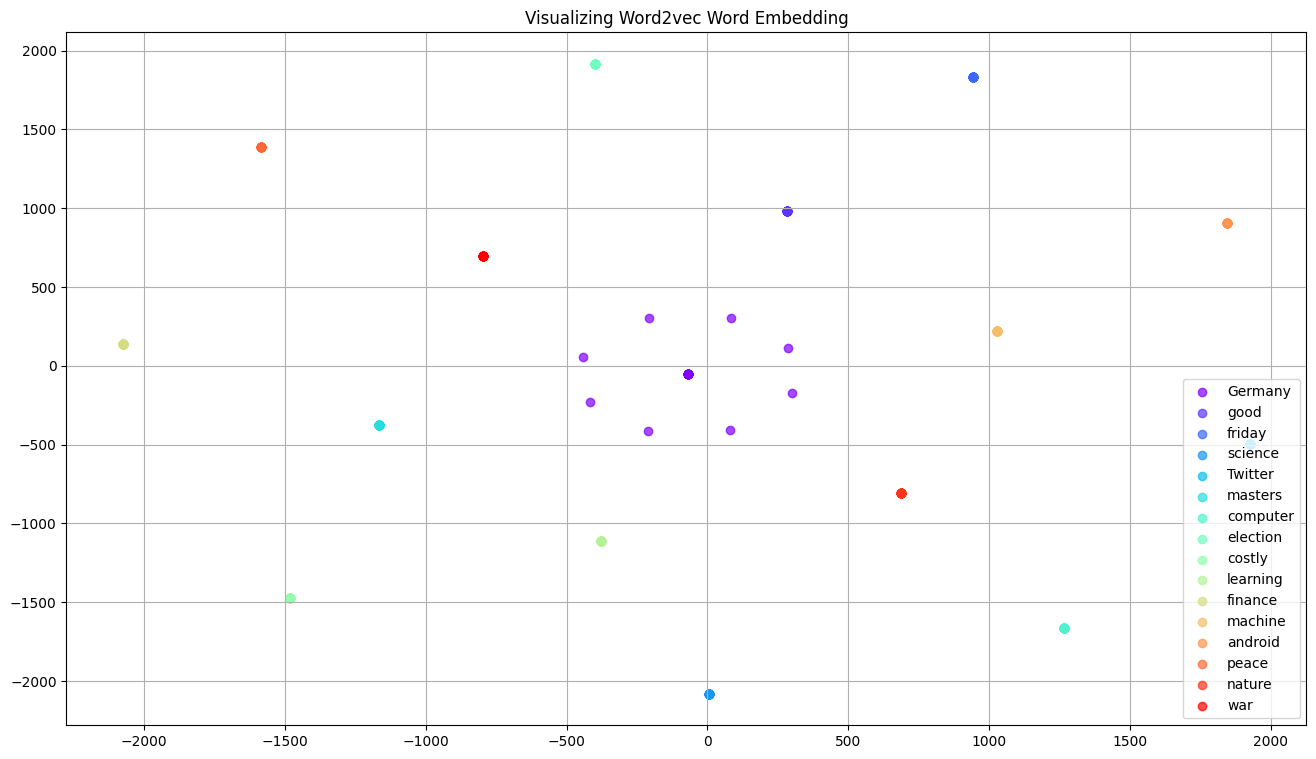

In [22]:
plot_most_similar_words(keys, tsne_embeddings, words_clusters, "Visualizing Word2vec Word Embedding")

# Text Classification - Deep Learning CNN Models

When it comes to text data, sentiment analysis is one of the most widely performed analysis on it. Sentiment Analysis has been through tremendous improvements from the days of classic methods to recent times where in the state of the art models utilize deep learning to improve the performance.

Convolutional Neural Networks or CNNs are the work-horse of the deep learning world. They have, in some sense, brought deep learning research into mainstream discussions. The advancements in the image classification world has left even humans behind.

In this project, we will attempt at performing sentiment analysis utilizing the power of CNNs.

In [23]:
!pip install contractions
!pip install textsearch
!pip install tqdm

import nltk
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import pandas as pd
import numpy as np

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load Movie Review Dataset

In [25]:
dataset = pd.read_csv(r'https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2011%20-%20Sentiment%20Analysis%20-%20Unsupervised%20Learning/movie_reviews.csv.bz2', compression='bz2')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [26]:
# take a peek at the data
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

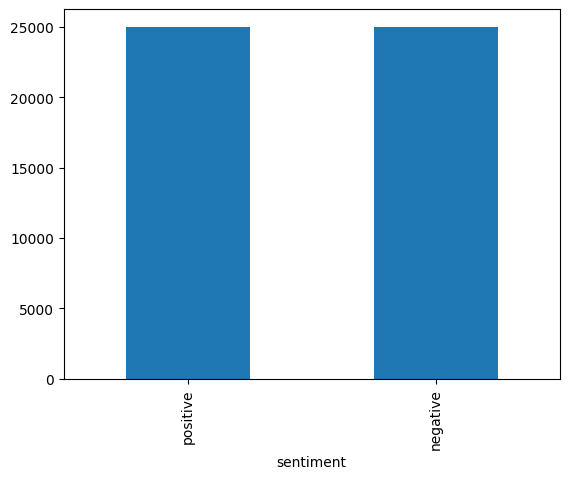

In [27]:
dataset["sentiment"].value_counts().plot(kind="bar")

# Text Wrangling & Normalization
Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import contractions
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_stopwords_and_stemming(text, stem):
    tokens = []
    for token in text.split():
      if token not in stopwords:
        # chops off the ends of words
        if stem:
          tokens.append(stemmer.stem(token))
        else:
          tokens.append(token)
    return " ".join(tokens)   

def pre_process_corpus(docs, stem = False):
    norm_docs = []
    # tqdm to display a progess bar while looping
    for doc in tqdm.tqdm(docs):
        # remove HTML tags
        doc = strip_html_tags(doc)

        # convert tab, new lines to empty spaces    
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # lowercase
        doc = doc.lower()

        # remove accented chars
        doc = unicodedata.normalize('NFKD', doc).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # expand shortened words, e.g. don't to do not
        doc = contractions.fix(doc)

        # Replace all non alphabets.
        doc = re.sub('[^a-zA-Z]', ' ', doc)

        # Single character removal
        doc = re.sub(r"\s+[a-zA-Z]\s+", ' ', doc)
        
        # remove white spaces
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()  

        # remove stop words and apply stemming
        doc = remove_stopwords_and_stemming(doc, stem)

        norm_docs.append(doc)        
    return norm_docs

In [30]:
dataset['review'] = pre_process_corpus(dataset['review'])

  2%|▏         | 802/50000 [00:00<00:43, 1144.08it/s]/tmp/ipykernel_23/1335968697.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 50000/50000 [00:43<00:00, 1147.33it/s]


In [31]:
dataset.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


# Positive Words

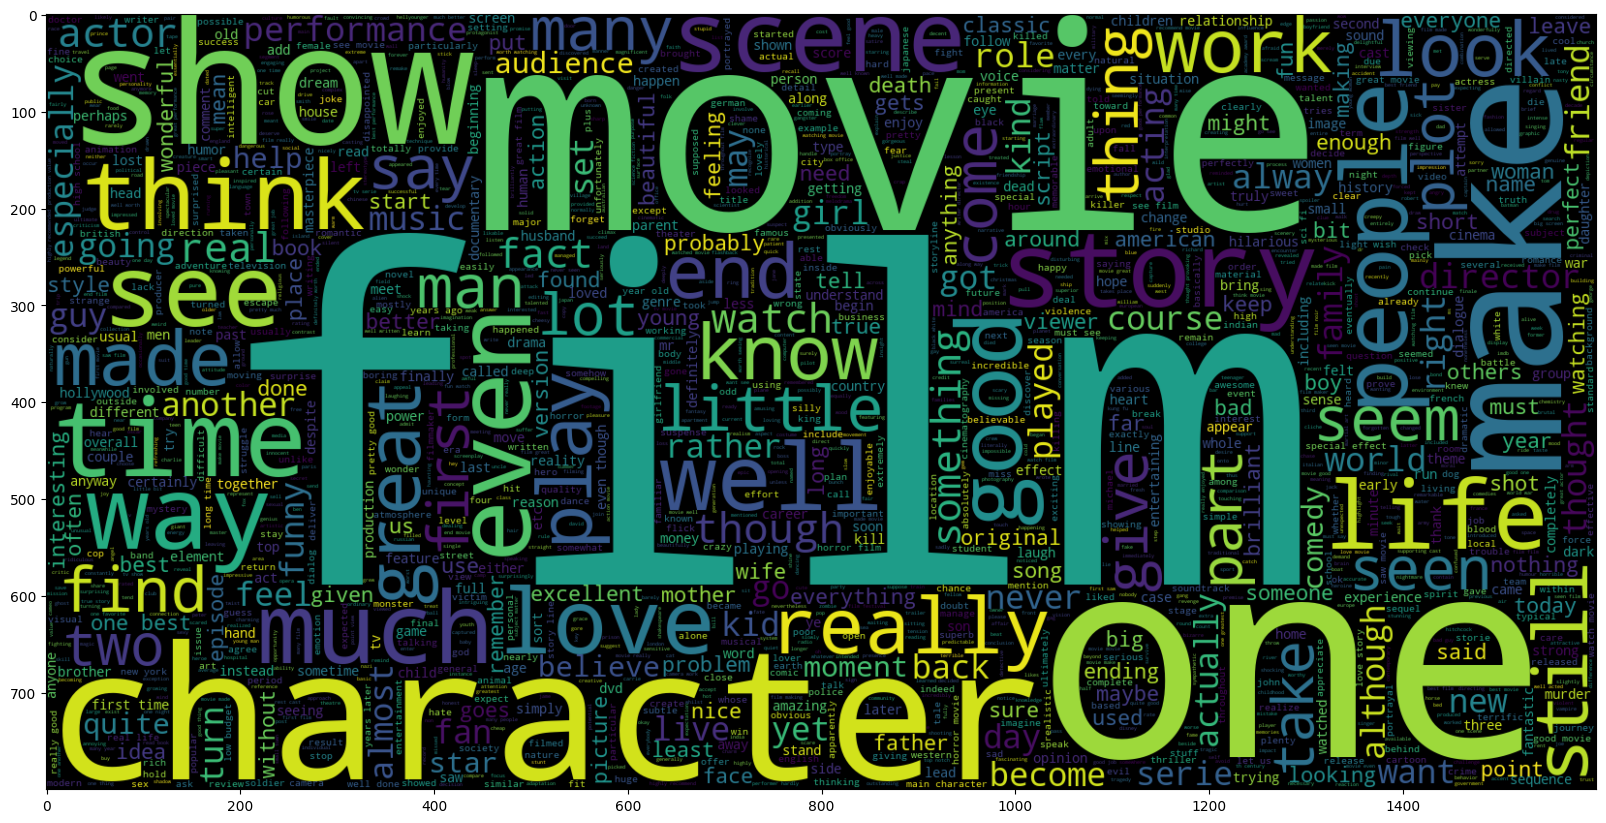

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.sentiment == 'positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

# Negative Words

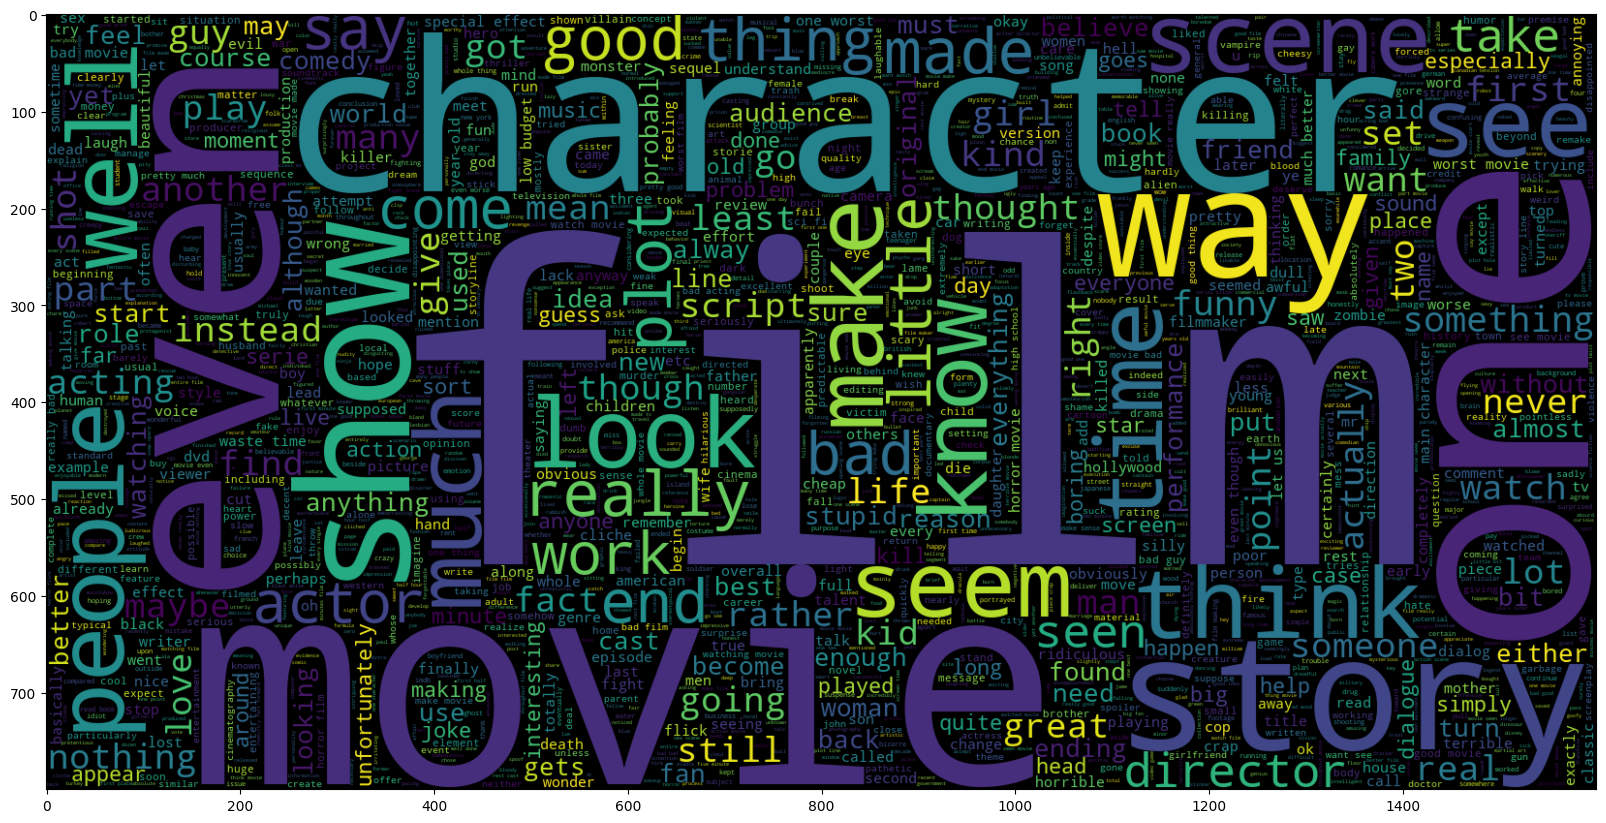

In [33]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.sentiment == 'negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

# Prepare Train and Split

In [34]:
from sklearn.model_selection import train_test_split

# Splits Dataset into Training and Testing set
train_data, test_data = train_test_split(dataset, test_size=0.2) 

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 40000
Test Data size 10000


# Tokenization
To prepare text data for our deep learning model, we transform each review into a sequence. Every word in the review is mapped to an integer index and thus the sentence turns into a sequence of numbers. The process is called Tokenization.

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. Tokenization

tokenizer create tokens for every word in the data corpus and map them to a index using dictionary.

word_index contains the index for each word

vocab_size represents the total number of word in the data corpus

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_data.review)

print("Vocabulary size: {}".format(len(tokenizer.word_index)))
print("Number of Documents: {}".format(tokenizer.document_count))

Vocabulary size: 92718
Number of Documents: 40000


In [36]:
# First and Last word
max([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])

(('wilshire', 92718), ('movie', 1))

In [37]:
train_sequences = tokenizer.texts_to_sequences(train_data.review)
test_sequences = tokenizer.texts_to_sequences(test_data.review)

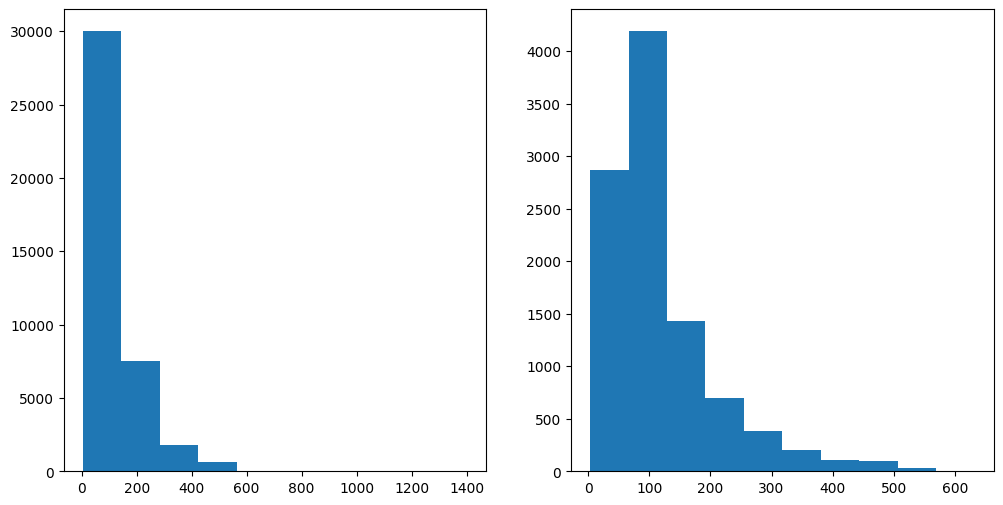

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

# Sequence Normalization
Not all reviews are of same length. To handle this difference in length of reviews, we define a maximum length. For reviews which are smaller than this length, we pad them with zeros which longer ones are truncated

In [39]:
MAX_SEQUENCE_LENGTH = 1000

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad dataset to a maximum review length in words
X_train = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((40000, 1000), (10000, 1000))

# Encoding Labels
The dataset contains labels of the form positive/negative. The following step encodes the labels using sklearn's LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes = 2 # positive -> 1, negative -> 0

In [42]:
y_train = le.fit_transform(train_data.sentiment)
y_test = le.transform(test_data.sentiment)

# Prepare the Model
Since textual data is a sequence of words, we utilize 1D convolutions to scan through the sentences. The model first transforms each word into lower dimensional embedding/vector space followed by 1d convolutions and then passing the data through dense layers before the final layer for classification

In [43]:
EMBED_SIZE = 300
EPOCHS = 2
BATCH_SIZE = 128
VOCAB_SIZE = len(tokenizer.word_index)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Embedding

# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))

# TODO: Continue building the CNN model

# Add 3 Conv1D layers with 128, 64, 32 filters, a kernel size of 4, and same padding
model.add(Conv1D(128, 4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, 4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Follow each Conv1D layer by a MaxPooling1D with a pool size of 2
# Flat all inputs
model.add(Flatten())
# A hidden layer with 256 units
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 

# The output
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [45]:
# TODO: Train the model with 2 epochs

history = model.fit(
    X_train, y_train,   # Training dataset (this should be a tf.data.Dataset or numpy array)
    epochs=2,  # Train for 2 epochs
    validation_data=(X_test, y_test),  # Validation dataset (optional)
    batch_size=32  # You can adjust the batch size if needed
)

# Optionally, you can print out the history for accuracy/loss tracking
print(history.history)

Epoch 1/2


I0000 00:00:1732991015.302040     189 service.cc:145] XLA service 0x5845472350c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732991015.302085     189 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732991015.302089     189 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   7/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.4997 - loss: 0.7002

I0000 00:00:1732991018.781377     189 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.7763 - loss: 0.4148 - val_accuracy: 0.9041 - val_loss: 0.2290
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9610 - loss: 0.1115 - val_accuracy: 0.8884 - val_loss: 0.2985
{'accuracy': [0.8565499782562256, 0.9564999938011169], 'loss': [0.31398141384124756, 0.11987756192684174], 'val_accuracy': [0.9041000008583069, 0.8884000182151794], 'val_loss': [0.22897709906101227, 0.2984640300273895]}


# Model Evaluation

In [46]:
# TODO: Evaluate the model on the test set and find accuracy

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy and loss
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8904 - loss: 0.2917
Test Loss: 0.2984640300273895
Test Accuracy: 0.8884000182151794


In [47]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [48]:
y_test[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [49]:
predictions = ['positive' if item == 1 else 'negative' for item in predictions]
predictions[:10]

['positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative']

In [50]:
# TODO: Print a classification report
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4961
           1       0.86      0.93      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Train our own Embedding using Word2Vec

In [51]:
from gensim.models.word2vec import Word2Vec

sentences = [row.split() for row in train_data.review]
# word2vec_model = Word2Vec(sentences, size=EMBED_SIZE, window=5, min_count=1, workers=16)
word2vec_model = Word2Vec(sentences, window=5, min_count=1, workers=16)
print(word2vec_model)

Word2Vec<vocab=92718, vector_size=100, alpha=0.025>


In [52]:
print(word2vec_model.wv.most_similar('mafia'))

[('vigilante', 0.7954842448234558), ('filipino', 0.7426934242248535), ('uncultured', 0.7374383211135864), ('serpents', 0.735998809337616), ('assassinating', 0.7329043745994568), ('battling', 0.7164762020111084), ('crooked', 0.7137795090675354), ('mob', 0.7128156423568726), ('ninja', 0.7121133208274841), ('corrupt', 0.7114735245704651)]


In [53]:
# TODO: Replace the Embedding Layer with your trained Embedding
# x = word2vec_model.wv.get_keras_embedding()(input)

# # Create a word index mapping from the Word2Vec model
# word_index = word2vec_model.wv.key_to_index  # this is the word-to-index mapping from Word2Vec

# # Create the embedding matrix with the shape (vocab_size, embedding_size)
# embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))  # +1 to account for the 0th index (padding)

# # Populate the embedding matrix with pre-trained Word2Vec embeddings
# for word, i in word_index.items():
#     embedding_vector = word2vec_model.wv[word]
#     embedding_matrix[i] = embedding_vector

In [54]:
# TODO: Retrain the model with 2 epochs
...

In [55]:
# TODO: Re-evaluate the model on the test set and find accuracy
...